## Step 1: import necessary libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

## Step2: Explore and analyse the data set  

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Step3: Data Preprocessing and Feature Engineering

In [6]:
df.duplicated().sum()

0

Correlation Matrix to detect the columns which exhibit multicollinearity

In [8]:
df['Gender'] = np.where(df['Gender']=='Male', 1, 0)

In [9]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,0,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.drop(columns=['RowNumber', "CustomerId", "Surname","Geography"], inplace=True)

In [11]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
def outlier_count(data):
    Q1=data.quantile(.25)
    Q3=data.quantile(.75)
    IQR=Q3-Q1
    upwhisk=Q3+(IQR*1.5)
    lowhisk=Q1-(IQR*1.5)
    outlier_count=0
    for i in range(len(data)):
        if data[i]>upwhisk or data[i]<lowhisk:
            outlier_count=+1
    return outlier_count

In [10]:
outliers=0
columns=['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for col in columns:
    outliers+=outlier_count(df[col])
print(f'No of Outliers:{outliers}')

No of Outliers:3


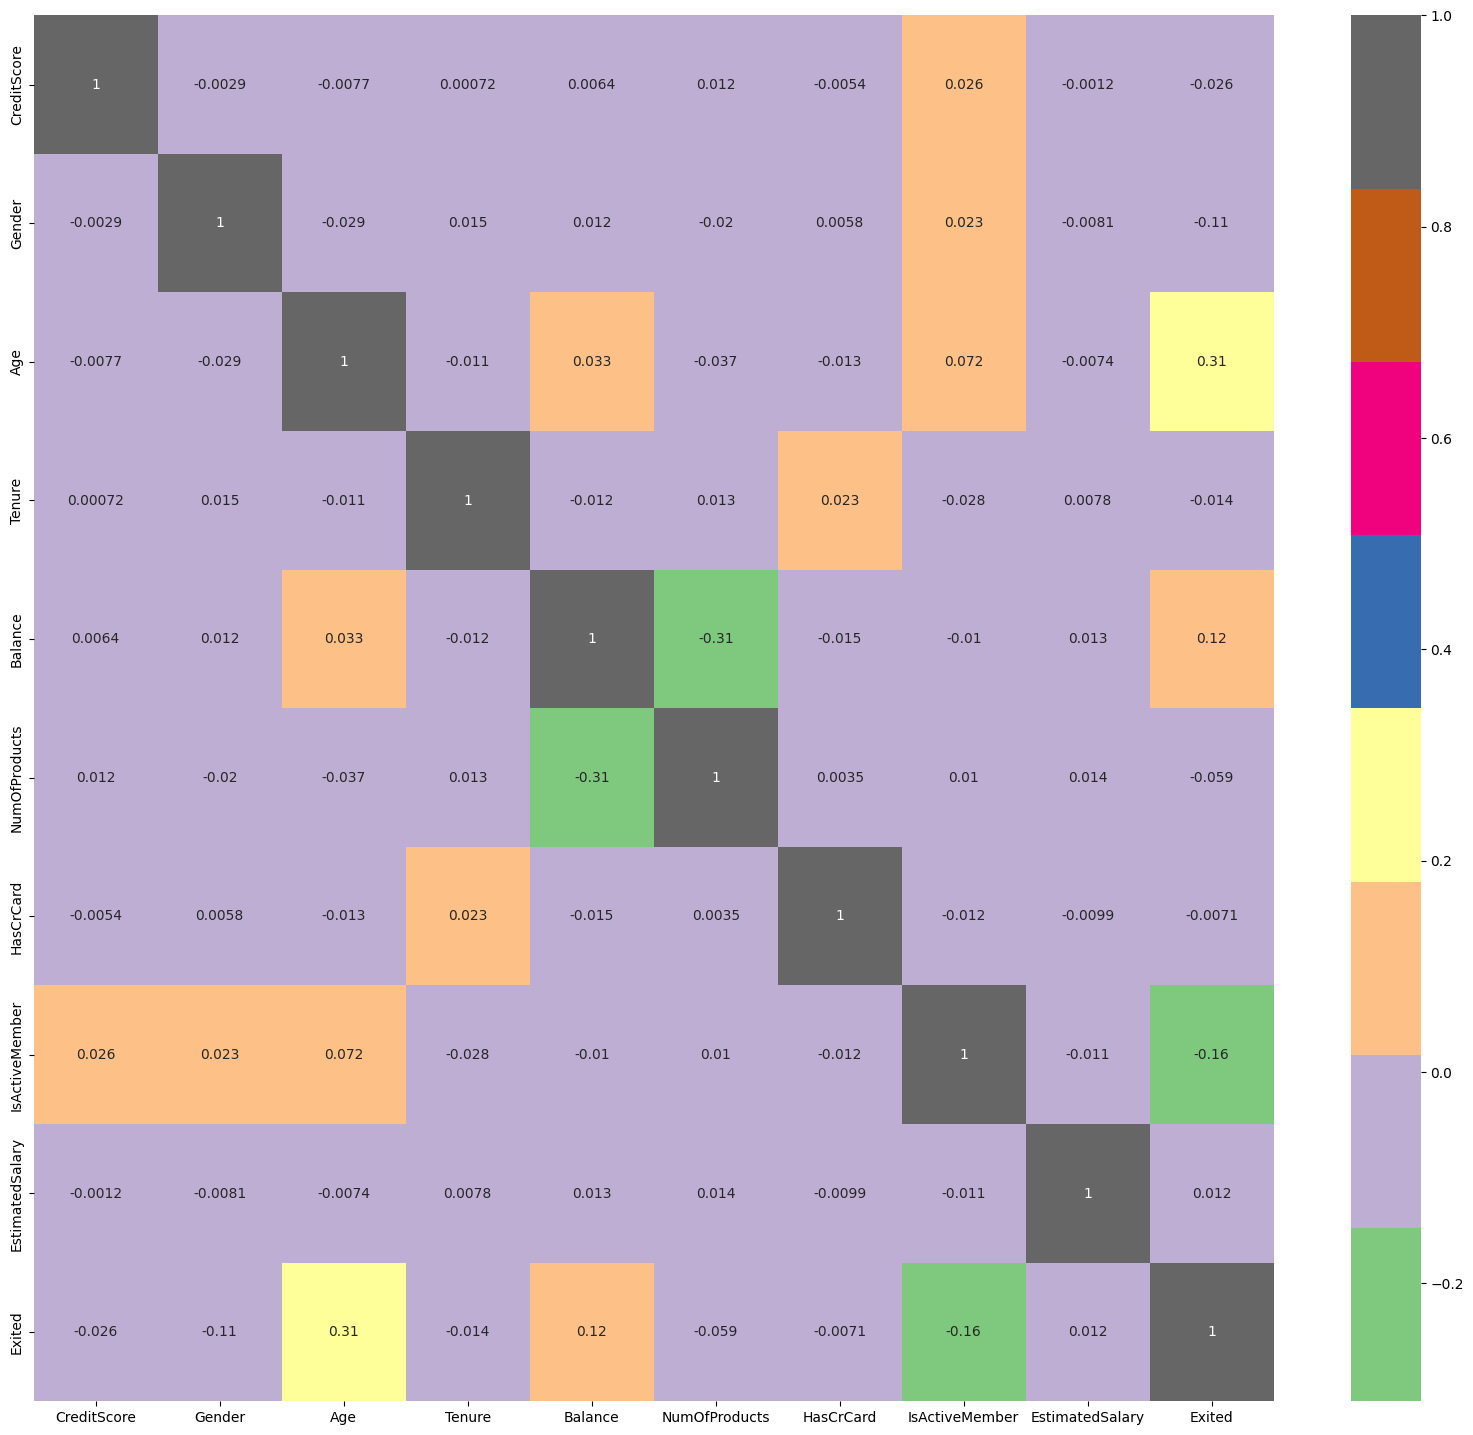

In [17]:
plt.figure(figsize=(20,18))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="Accent")
plt.show()

## Step4: Train and Build the Logistic regression Model 

In [18]:
X = df.drop(columns = ['Exited']).values #Independent(decision) variables

In [19]:
y = df['Exited'].values #Dependent(Target) variable 

Train test splitting into 75:25 ratio of the dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
lr = LogisticRegression(solver='newton-cholesky',max_iter=150)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=150, solver='newton-cholesky')

## Step5: Model Evaluation and validation

In [86]:
print(f"Training score= {lr.score(X_train,y_train):.2%}")

Training score= 81.49%


In [87]:
print(f"Test Score= {lr.score(X_test,y_test):.2%}")

Test Score= 82.24%


In [88]:
# Predict on the test set
y_pred = lr.predict(X_test)

In [89]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1948   55]
 [ 389  108]]


In [92]:
TN, FP, FN, TP = conf_matrix.ravel()

In [94]:
print(f"{TN= }\n{FP= }\n{FN= }\n{TP= }")

TN= 1948
FP= 55
FN= 389
TP= 108


In [39]:
precision = TP / (TP + FP)
print(f"{precision= :.2%}")

precision= 50.45%


In [40]:
recall = TP / (TP + FP)
print(f"{recall= :.2%}")

recall= 11.27%


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2003
           1       0.50      0.11      0.18       497

    accuracy                           0.80      2500
   macro avg       0.66      0.54      0.54      2500
weighted avg       0.75      0.80      0.75      2500



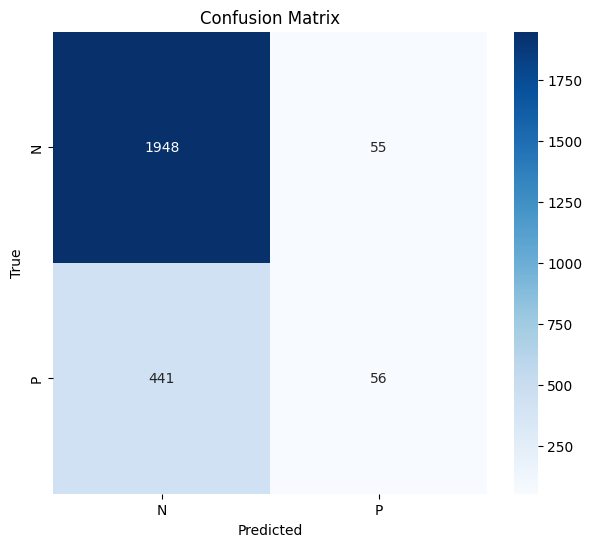

In [41]:
class_names = 'NP'
plt.figure(figsize=(7,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()